# LRR Annotator

Below is example usage of the LRR annotator. 

The `Loader`, `Analyzer`, and `Plotter` objects load PDB files from disk, analyze them / perform regressions, and produce winding number plots.

Make sure to `pip install -e .` from the directory containing `setup.py` before running this code. (Recommended to do this inside a Conda environment, or virtual environment,
so that dependencies installed don't interfere with your existing `pip`). 

In [1]:
from lrr_annot import Loader, Analyzer, Plotter

In [2]:
L = Loader()
A = Analyzer()
P = Plotter()

In [9]:
import matplotlib.pyplot as plt

In [3]:
import inspect
print(inspect.getsource(A.compute_windings))

	def compute_windings(self, smoothing = 20, progress = True):
		"""Computes the normal bundle framing and cumulative winding number
		for each protein structure stored in the `structures` dictionary.
		The backbone, normal bundle, "flattened" curve (projection to the
		normal bundle), and cumulative winding number are stored to
		the respective member variables: `backbones`, `normal_bundles`, `flattened`,
		and `winding`.

		Args:
			smoothing (int, optional): Amount of smoothing to apply when computing the
			backbone curve. Defaults to 20.
		"""
		for key, structure in (tqdm(self.structures.items(), desc = 'Computing windings') if progress else self.structures.items()):
			X = gaussian_filter(structure, [1, 0]) # smoothed out structure
			Y = gaussian_filter(X, [smoothing, 0]) # backbone
			dY = gaussian_filter(Y, [1, 0], order = 1) # tangent of backbone
			dZ = dY / np.sqrt(np.sum(dY ** 2, axis = 1))[:, np.newaxis] # normalized tangent

			# parallel transport along backbone
			# V[

In [3]:
pdb_cached = True
geometry_cached = False
regressions_cached = False

make_cache = True

if pdb_cached:
    L.retrieve('./cache')
else:
    L.load_batch('./pdb')
    
if geometry_cached:
    A.retrieve_geometry('./cache')
else:
    A.load_structures(L.structures)
    A.compute_windings()
    
if regressions_cached:
    A.retrieve_regressions('./cache')
else:
    A.compute_regressions()
    
if make_cache:
    L.cache('./cache')
    A.cache_geometry('./cache')
    A.cache_regressions('./cache')

Computing regressions: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 177/177 [03:36<00:00,  1.22s/it]


In [4]:
P.load(A.windings, A.regressions, A.slopes)

In [5]:
P.plot_regressions(save = True, directory = './plots')

Making plots: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 177/177 [00:07<00:00, 22.28it/s]


In [47]:
ds = gaussian_filter(s, 1, order = 1)
dc = gaussian_filter(c, 1, order = 1)

plt.plot((c * ds - s * dc) / (s ** 2 + c ** 2)); plt.show()
plt.plot(np.cumsum((c * ds - s * dc) / (s ** 2 + c ** 2)) / 2 * np.pi)

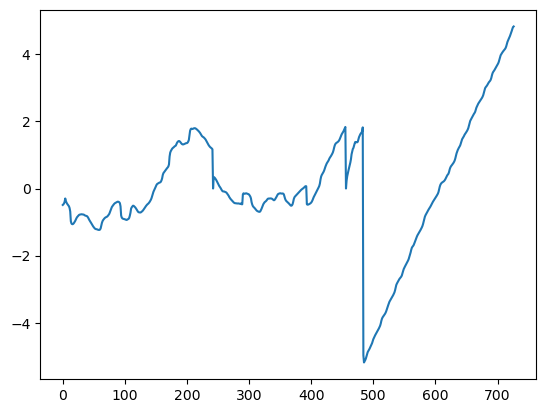

In [17]:
plt.plot(A.windings['AT1G10920.1'])

In [12]:
A.regressions['AT5G66890.1']

array([149.96339145, 267.18798222])

In [43]:
np.sign(winding[-1] - winding[0])

NameError: name 'winding' is not defined

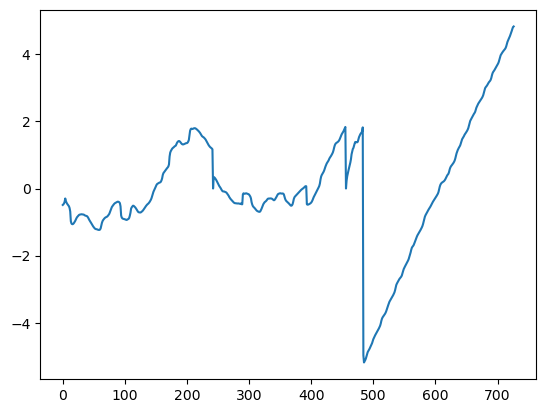

In [46]:
plt.plot(winding)

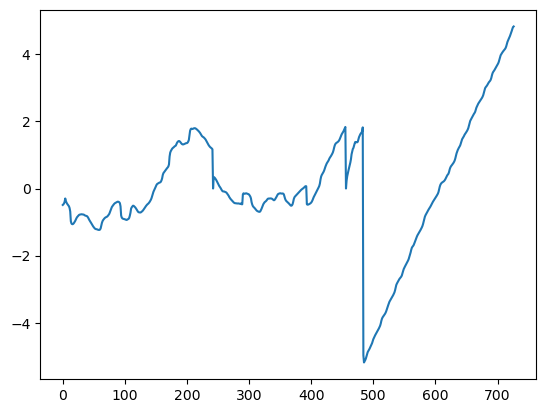

In [42]:
plt.plot(A.windings['AT1G10920.1'])

In [49]:
X = gaussian_filter(L.structures['AT1G10920.1'], [1,0])

In [62]:
X.shape

(727, 3)

In [59]:
smoothing = 20

In [60]:
Y = gaussian_filter(X, [smoothing, 0]) # backbone

In [61]:
Y.shape

(727, 3)

In [63]:
dY = gaussian_filter(Y, [1, 0], order = 1) # tangent of backbone

In [64]:
dZ = dY / np.sqrt(np.sum(dY ** 2, axis = 1))[:, np.newaxis] # normalized tangent

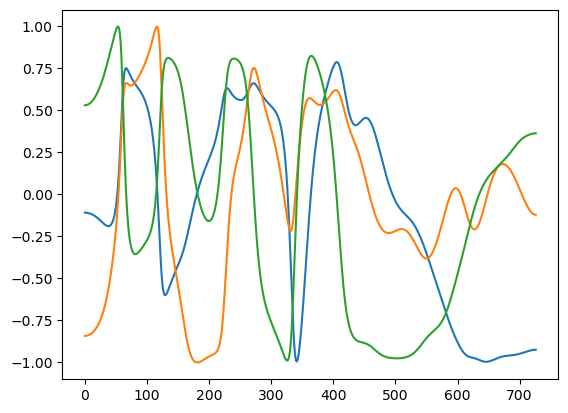

In [65]:
plt.plot(dZ)

In [69]:
V = np.zeros((len(dZ), 2, 3))
V[0] = np.random.rand(2, 3)
for i, z in enumerate(dZ):
    if i: V[i] = V[i-1]

    # remove projection onto z, the current tangent vector,
    # then enforce orthonormality
    V[i] -= np.outer(V[i] @ z, z)
    V[i] = compromise(*V[i])


In [68]:
from lrr_annot.analyzer import compromise

In [78]:
V[:,0,:].shape

(727, 3)

In [97]:
news = np.array([x @ v for x, v in zip(X - Y, V[:,0,:])])
newc = np.array([x @ w for x, w in zip(X - Y, V[:,1,:])])

SyntaxError: can't use starred expression here (1534204365.py, line 1)

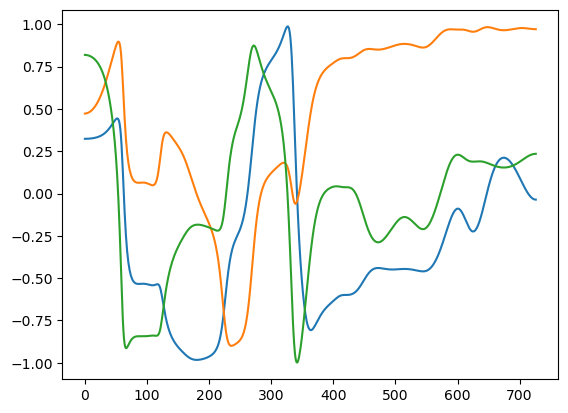

In [76]:
plt.plot(V[:,0,:])

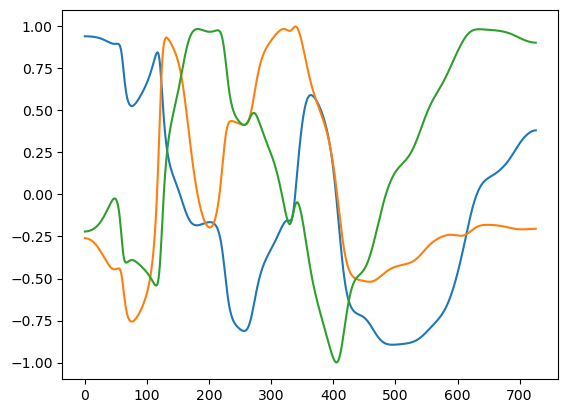

In [77]:
plt.plot(V[:,1,:])

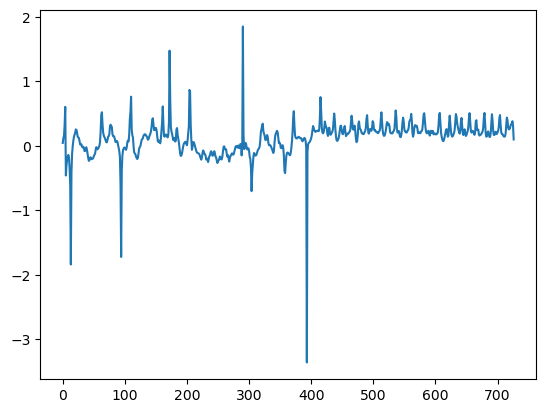

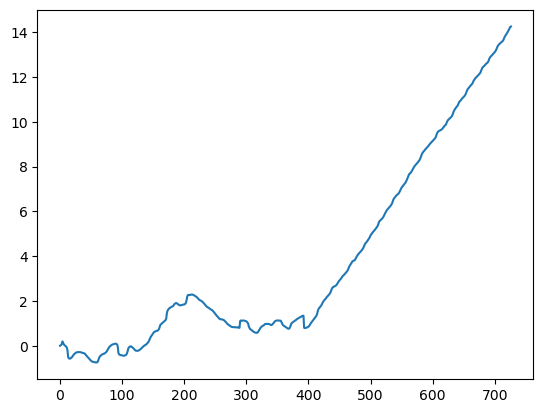

In [101]:
newds = gaussian_filter(news, 1, order = 1)
newdc = gaussian_filter(newc, 1, order = 1)

plt.plot((newc * newds - news * newdc) / (news ** 2 + newc ** 2)); plt.show()
plt.plot(np.cumsum((newc * newds - news * newdc) / (news ** 2 + newc ** 2)) / (2 * np.pi))